In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer 
import re
%matplotlib inline

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df = pd.read_csv('/content/Shark Tank Companies (2).csv')

In [ ]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


We have to use the description column for thsi text minign activity and Deal is our dependent column.

In [ ]:
df = df[['deal', 'description']]

In [ ]:
df

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         495 non-null    bool  
 1   description  495 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.5+ KB


In [ ]:
df.describe()

,deal,description
count,495,495
unique,2,493
top,True,Premium wine sold by the glass in individually...
freq,251,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


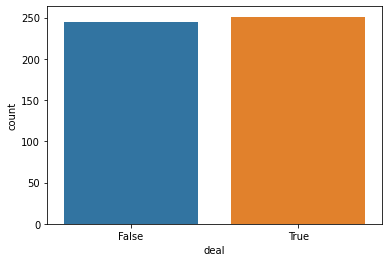

In [ ]:
sns.countplot(df['deal'])

In [ ]:
df['description'][15]

'A franchise-model company offering professional graffiti removal.'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f79e2473f10>,
      dtype=object)

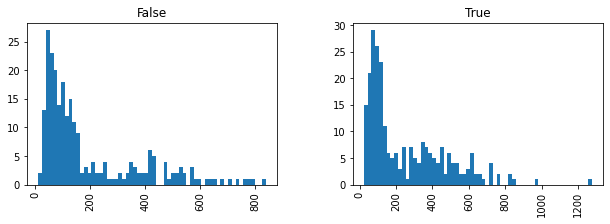

In [ ]:
df['word_count'] = df['description'].apply(len)
df.hist(column ='word_count',by='deal',grid=True,bins=60,figsize=(10,3))

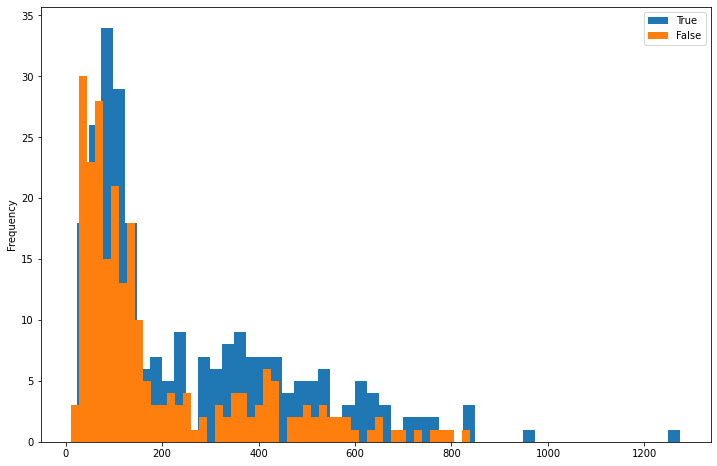

In [ ]:
plt.figure(figsize =(12,8))
df[df['deal'] == True]['word_count'].plot(kind = 'hist', bins = 50, label = True)
df[df['deal'] == False]['word_count'].plot(kind = 'hist', bins = 50, label = False)
plt.legend()

In [ ]:
df['deal'].value_counts()

True     251
False    244
Name: deal, dtype: int64

In [ ]:
df_true = df[df['deal'] == True]

In [ ]:
df_false = df[df['deal'] == False]

In [ ]:
df_true.head()

,deal,description,word_count
1,True,Retail and wholesale pie factory with two reta...,73
2,True,Ava the Elephant is a godsend for frazzled par...,244
5,True,One of the first entrepreneurs to pitch on Sha...,365
9,True,An educational record label and publishing hou...,122
10,True,A battery-operated cooking device that siphons...,117


In [ ]:
df_false.sample(5)

,deal,description,word_count
47,False,A chain of children's play and learning centers.,48
332,False,Buzzy helps administer shots comfortably to ki...,289
149,False,A roller-coaster ride powered by the people ri...,54
164,False,"eCreamery makes small-batch ice cream, gelato,...",514
35,False,Fashion accessories company focused on its uni...,77


In [ ]:
def processing(text):
  Stopwords = stopwords.words('english')
  #Convert to lower
  text = text.lower()
  return ' '.join([char for char in text.split() if char not in Stopwords])

# For the data where deal = True

In [ ]:
#Find the number of characters for both the corpuses.
df_true['char_count'] = df_true['description'].apply(lambda x: len(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Remove stopwords
df_true['clean_description'] = df_true['description'].apply(processing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#What were the top 3 most frequently occurring words in both corpuses
from collections import Counter
most_frequent_true = Counter(" ".join(df_true['clean_description']).split()).most_common(3)
most_frequent_true

[('also', 42), ('makes', 32), ('made', 32)]

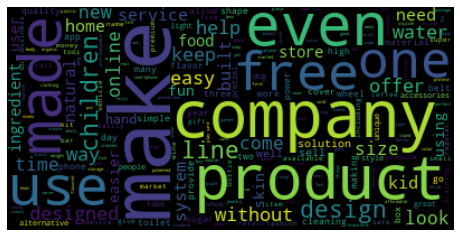

In [ ]:
#word Cloud
from wordcloud import WordCloud
text = "".join(w for w in df_true['clean_description'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# For the data where deal = False

In [ ]:
#Find the number of characters for both the corpuses.
df_false['char_count'] = df_false['description'].apply(lambda x: len(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Remove stopwords
df_false['clean_description'] = df_false['description'].apply(processing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#What were the top 3 most frequently occurring words in both corpuses
from collections import Counter
most_frequent_false = Counter(" ".join(df_false['clean_description']).split()).most_common(3)
most_frequent_false

[('made', 41), ('company', 19), ('also', 19)]

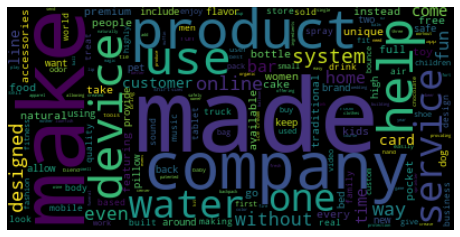

In [ ]:
#word Cloud
from wordcloud import WordCloud
text = "".join(w for w in df_false['clean_description'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Getting data ready for modelling

In [ ]:
df.sample(10)

,deal,description,word_count
156,False,An energy drink marketed to women over the age...,53
361,True,Zoobean is a parent and educator's ultimate co...,373
130,False,A mobile training device that simulates a bask...,62
30,False,A fitness program fusing dance routines.,40
73,True,"Mod Mom Furniture is stylish, high-quality, ma...",470
368,False,Disposable tableware that is compostable yet c...,204
55,True,A way to save the lipstick that gets stuck at ...,69
348,True,The Paint Brush Cover stores paint-covered bru...,375
402,False,EmergenSee turns your smartphone or tablet int...,260
475,False,A technology platform allowing content creator...,138


In [ ]:
for x in range(20,30):
  print(x , '\n', df['description'][x])

20 
 An online journaling service focused on facilitating users' progress towards achieving and maintaining their emotional well-being.
21 
 Granola Gourmet offers a line of granola bars that diabetics can safely enjoy. Unlike most granola bars on the market, Granola Gourmet's bars have a low glycemic index. Having a low glycemic index means that they are less prone to causing spikes in blood sugar, which aren't good for anybody and especially damaging for diabetics. Granola Gourmet's bars are made with ingredients that naturally have a low glycemic index, so they release their carbohydrates slowly into the bloodstream. Granola Gourmet products have been tested by GI Labs, which developed the glycemic index concept. They Ultimate Fudge Brownie bar has a glycemic index of just 23, well below the threshold to be considered low glycemic.
22 
 A fitness machine with a series of bands of varying weights to make pushups easier.
23 
 A funeral concierge service that writes the eulogy, officia

Lematisation

Remove punctuations

Remove stopwords


In [ ]:
cleaned_desc = []
lemma = WordNetLemmatizer()
def textprocess(text):
  Stopwords = stopwords.words('english')
  cleaned_desc = ''.join([char for char in text if char not in string.punctuation])
  cleaned_desc = ' '.join(char.lower() for char in cleaned_desc.split())
  cleaned_desc = ''.join([lemma.lemmatize(w) for w in cleaned_desc])

  return ' '.join([word for word in cleaned_desc.split() if word.lower() not in Stopwords])

In [ ]:
df['cleaned_message']= df['description'].apply(textprocess)

In [ ]:
df

,deal,description,word_count,cleaned_message
0,False,Bluetooth device implant for your ear.,38,bluetooth device implant ear
1,True,Retail and wholesale pie factory with two reta...,73,retail wholesale pie factory two retail locati...
2,True,Ava the Elephant is a godsend for frazzled par...,244,ava elephant godsend frazzled parents young ch...
3,False,"Organizing, packing, and moving services deliv...",68,organizing packing moving services delivered c...
4,False,Interactive media centers for healthcare waiti...,112,interactive media centers healthcare waiting r...
...,...,...,...,...
490,True,Zoom Interiors is a virtual service for interi...,328,zoom interiors virtual service interior design...
491,True,Spikeball started out as a casual outdoors gam...,504,spikeball started casual outdoors game grown b...
492,True,Shark Wheel is out to literally reinvent the w...,502,shark wheel literally reinvent wheel innovativ...
493,False,Adriana Montano wants to open the first Cat Ca...,426,adriana montano wants open first cat cafe flor...


In [ ]:
for x in range(20,30):
  print('\n', df['cleaned_message'][x])


 online journaling service focused facilitating users progress towards achieving maintaining emotional wellbeing

 granola gourmet offers line granola bars diabetics safely enjoy unlike granola bars market granola gourmets bars low glycemic index low glycemic index means less prone causing spikes blood sugar arent good anybody especially damaging diabetics granola gourmets bars made ingredients naturally low glycemic index release carbohydrates slowly bloodstream granola gourmet products tested gi labs developed glycemic index concept ultimate fudge brownie bar glycemic index 23 well threshold considered low glycemic

 fitness machine series bands varying weights make pushups easier

 funeral concierge service writes eulogy officiates funeral service handles postfuneral family gatherings

 line surgical masks designed fashionable fun

 sports bras engineered work womans body based activity enjoys

 madetoorder energy bars made whole natural ingredients customers choose ingredients go 

In [ ]:
df['deal']= df['deal'].map({False : 0, True:1})

In [ ]:
df

,deal,description,word_count,cleaned_message
0,0,Bluetooth device implant for your ear.,38,bluetooth device implant ear
1,1,Retail and wholesale pie factory with two reta...,73,retail wholesale pie factory two retail locati...
2,1,Ava the Elephant is a godsend for frazzled par...,244,ava elephant godsend frazzled parents young ch...
3,0,"Organizing, packing, and moving services deliv...",68,organizing packing moving services delivered c...
4,0,Interactive media centers for healthcare waiti...,112,interactive media centers healthcare waiting r...
...,...,...,...,...
490,1,Zoom Interiors is a virtual service for interi...,328,zoom interiors virtual service interior design...
491,1,Spikeball started out as a casual outdoors gam...,504,spikeball started casual outdoors game grown b...
492,1,Shark Wheel is out to literally reinvent the w...,502,shark wheel literally reinvent wheel innovativ...
493,0,Adriana Montano wants to open the first Cat Ca...,426,adriana montano wants open first cat cafe flor...


In [ ]:
X = df['cleaned_message']
y = df['deal']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Create Bag of words using count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
cv = CountVectorizer()
X_train_transform = cv.fit_transform(X_train)
X_test_transform  = cv.transform(X_test)

In [ ]:
# Build Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_transform, y_train)
y_pred_class = nb.predict(X_test_transform)
from sklearn import metrics
round(metrics.accuracy_score(y_test, y_pred_class),2)

0.62

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_transform, y_train)
forest_prediction = nb.predict(X_test_transform)
round(metrics.accuracy_score(y_test, forest_prediction),2)

0.62

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[48, 40],
       [23, 53]])

In [ ]:
metrics.confusion_matrix(y_test, forest_prediction)

array([[48, 40],
       [23, 53]])